In [ ]:
import pandas as pd;
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler as sscl
from sklearn.linear_model import LinearRegression as lnr
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline as ppln
from sklearn.pipeline import make_pipeline
from sklearn import set_config 
from sklearn.compose import ColumnTransformer as cult

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Flight ticket dataset/Dataset.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# ---->Preprocessing<----

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# ----> Data Exploration <----

In [ ]:
def into_datetime(column):
    data[column]=pd.to_datetime(data[column]) 

In [ ]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    into_datetime(i)

In [ ]:
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month

In [ ]:
data=data.drop(["Date_of_Journey"],axis=1)

In [ ]:
data.head(6)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-08 05:50:00,2022-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-08 18:05:00,2022-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-08 16:50:00,2022-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-05-08 09:00:00,2022-05-08 11:25:00,2h 25m,non-stop,No info,3873,24,6


In [ ]:
# function for extracting hour and minutes
def get_hour(dat,column):
    dat[column+'_hour']=dat[column].dt.hour

def get_min(dat,column):
    dat[column+'_min']=dat[column].dt.minute
    

def drop_col(dat,column):
    dat.drop(column,axis=1)

In [ ]:
get_hour(data,'Dep_Time')

get_min(data,'Dep_Time')

data=data.drop(["Dep_Time"],axis=1)

In [ ]:
get_hour(data,'Arrival_Time')

get_min(data,'Arrival_Time')

data=data.drop(["Arrival_Time"],axis=1)

In [ ]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [ ]:
period=list(data['Duration'])
for i in range(len(period)):
    if len(period[i].split(' '))!=2:
        if 'h' not in period[i]: 
             period[i]=' 0h'+ period[i]
        else:
             period[i]=period[i] + ' 0m'
    
    else:
        pass
        
lst1=[]
lst2=[]
for i in period:
    lst1.append(int(i.split(sep="h")[0]))
    lst2.append(int(i.split(sep="h")[0].split()[-1]))

In [ ]:
data['Duration']=period
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [ ]:
def hour(col):
    t=col.split(" ")[0][:-1]
    return t

def minutes(col):
    t=col.split(" ")[1][:-1]
    return t


data['duration_hour']=data['Duration'].apply(hour)
data['duration_min']=data['Duration'].apply(minutes)

In [ ]:
data=data.drop(["Duration"],axis=1)
data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [ ]:
data['location1']=data['Route'].str.split('→').str[0]
data['location2']=data['Route'].str.split('→').str[1]
data['location3']=data['Route'].str.split('→').str[2]
data['location4']=data['Route'].str.split('→').str[3]
data['location5']=data['Route'].str.split('→').str[4]

data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,location1,location2,location3,location4,location5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40,BLR,DEL,NaN,NaN,NaN


# ---->Visualization<----

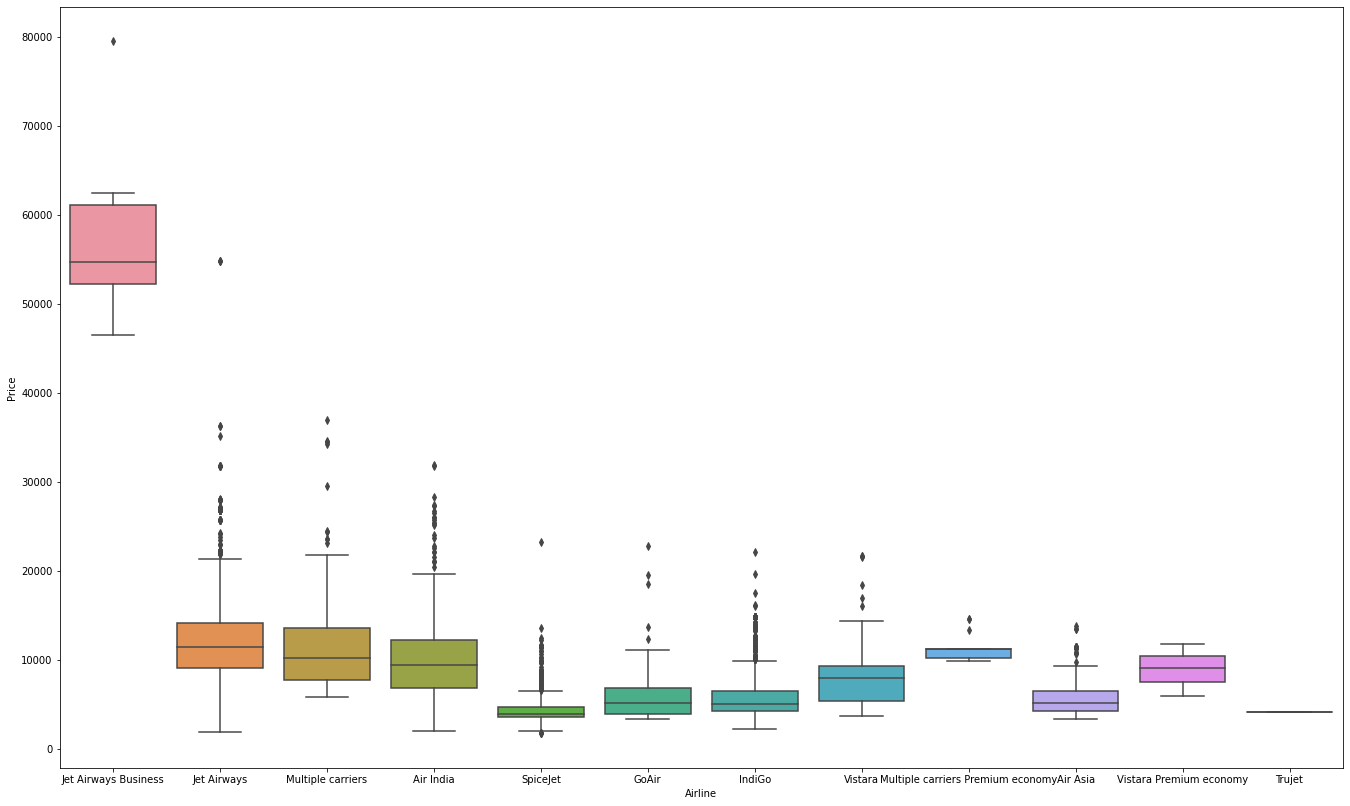

In [ ]:
plt.figure(figsize=(23,14))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))

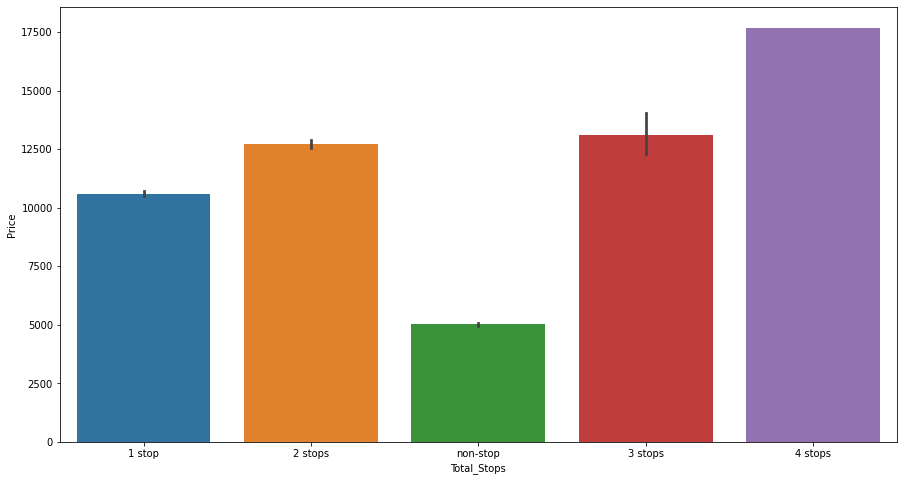

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

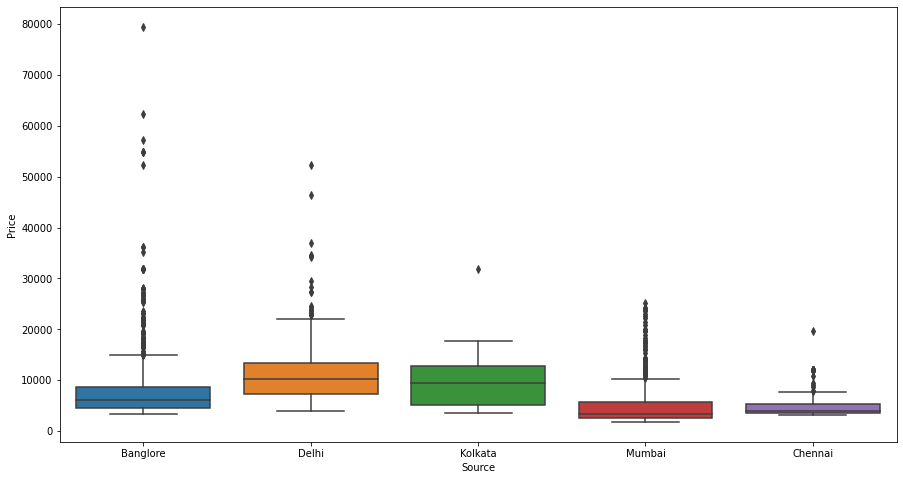

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))

# ---->Categorical Encoding<----

In [ ]:
data=data.drop(["Route"],axis=1)
list(data.columns)

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'duration_hour',
 'duration_min',
 'location1',
 'location2',
 'location3',
 'location4',
 'location5']

In [ ]:

columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'location1', 'location2', 'location3', 'location4', 'location5','duration_hour','duration_min']
lbcode = LabelEncoder()
for i in columns:
    data[i] = lbcode.fit_transform(data[i])
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,location1,location2,location3,location4,location5
0,3,0,5,4,8,3897,24,3,22,20,1,10,12,11,0,13,29,13,5
1,1,3,0,1,8,7662,5,1,5,50,13,15,41,5,2,25,1,3,5
2,4,2,1,1,8,13882,6,9,9,25,4,25,11,0,3,32,4,5,5
3,3,3,0,0,8,6218,5,12,18,5,23,30,39,5,2,34,3,13,5
4,3,0,5,0,8,13302,3,1,16,50,21,35,34,9,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,4,9,19,55,22,25,12,6,2,5,29,13,5
10679,1,3,0,4,8,4145,27,4,20,45,23,20,12,7,2,5,29,13,5
10680,4,0,2,4,8,7229,27,4,8,20,11,20,23,0,0,13,29,13,5
10681,10,0,5,4,8,12648,3,1,11,30,14,10,12,8,0,13,29,13,5


In [ ]:
data.dtypes

Airline              int64
Source               int64
Destination          int64
Total_Stops          int64
Additional_Info      int64
Price                int64
journey_day          int64
journey_month        int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
duration_hour        int64
duration_min         int64
location1            int64
location2            int64
location3            int64
location4            int64
location5            int64
dtype: object

In [ ]:
x=data.drop(["Price"],axis=1)
y=data['Price']
x,y

(       Airline  Source  Destination  Total_Stops  Additional_Info  \
 0            3       0            5            4                8   
 1            1       3            0            1                8   
 2            4       2            1            1                8   
 3            3       3            0            0                8   
 4            3       0            5            0                8   
 ...        ...     ...          ...          ...              ...   
 10678        0       3            0            4                8   
 10679        1       3            0            4                8   
 10680        4       0            2            4                8   
 10681       10       0            5            4                8   
 10682        1       2            1            1                8   
 
        journey_day  journey_month  Dep_Time_hour  Dep_Time_min  \
 0               24              3             22            20   
 1                5     

In [ ]:
data.dtypes

Airline              int64
Source               int64
Destination          int64
Total_Stops          int64
Additional_Info      int64
Price                int64
journey_day          int64
journey_month        int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
duration_hour        int64
duration_min         int64
location1            int64
location2            int64
location3            int64
location4            int64
location5            int64
dtype: object

# ----> Scaling & splitting of dataset<----

In [ ]:
datacopy=data.copy(deep=True)
scaled_features = data.copy()
columns = ['Dep_Time_hour','Dep_Time_min','Arrival_Time_hour','Arrival_Time_min']
feats = datacopy[columns]
scalerfit = sscl().fit(feats.values)
features = scalerfit.transform(feats.values)
datacopy[columns] = features
data = datacopy

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train.dtypes

Airline              int64
Source               int64
Destination          int64
Total_Stops          int64
Additional_Info      int64
journey_day          int64
journey_month        int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
duration_hour        int64
duration_min         int64
location1            int64
location2            int64
location3            int64
location4            int64
location5            int64
dtype: object

# ====>**Regression Models**<====

# Model-1

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
ypre=model.predict(x_test)
print(mean_squared_error(y_test,ypre))
print(mean_absolute_error(y_test,ypre))

3477203.2351557217
675.8498674153798


# Model-2

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
ypre=model.predict(x_test)
print(mean_squared_error(y_test,ypre))
print(mean_absolute_error(y_test,ypre))

2361654.8559875973
632.2045266506228


# Model-3

In [ ]:
model=lnr()
model.fit(x_train,y_train)
ypre=model.predict(x_test)
print(mean_squared_error(y_test,ypre))
print(mean_absolute_error(y_test,ypre))

10711401.346973589
2302.0602346031383


# Model-4

In [ ]:
model=SVR()
model.fit(x_train,y_train)
ypre=model.predict(x_test)
print(mean_squared_error(y_test,ypre))
print(mean_absolute_error(y_test,ypre))

20791739.42693946
3470.717739783467


# ---->Accuracy Score<----

In [ ]:
pipeline = ppln([('scaler', sscl()), ('Random forest regressor', RandomForestRegressor())])
pipeline.fit(x_train, y_train)
pipeline.score(x_test, y_test)

0.8863558979003768

# **---->Pipeline<----**

In [ ]:
categorical = ppln( steps=[ ("LabelEncoder", LabelEncoder()) ] )

numerical = ppln( steps=[ ("scaler", sscl()), ] )

coltr = cult(
    [   ("categorical", categorical, ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'location1', 'location2', 'location3', 'location4', 'location5','dur_hour','dur_min']),
        ("numerical", numerical, ['Dep_Time_hour','Dep_Time_min','Arrival_Time_hour','Arrival_Time_min']), ] )


pipeline = make_pipeline(coltr, RandomForestRegressor())
set_config(display="diagram")
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('LabelEncoder',
                                                                   LabelEncoder())]),
                                                  ['Airline', 'Source',
                                                   'Destination', 'Total_Stops',
                                                   'Additional_Info',
                                                   'location1', 'location2',
                                                   'location3', 'location4',
                                                   'location5', 'dur_hour',
                                                   'dur_min']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dep_Time_hour',
                                                   'Dep_Time_min',
                                                   'Arrival_Time_hour',
                                                   'Arrival_Time_min'])])),
                ('randomforestregressor', RandomForestRegressor())])

--------------------------------------------------------------------------------